### This file takes the merged dataframe of ACS Data and NPI information for Model Building

### Prep

In [1]:
### Install if needed
# !pip install pgeocode
# !pip install censusgeocode

### Import Libraries 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Import mergedTable from mainCounty output
mergedTable = pd.read_pickle('mergedTableAllCounties.pkl')
mergedTable.head()

,County,Provider Count,County Name,householdIncomeBins,hsDegreeBins,marriedBins,cohabitingBins,maleHouseholderBins,femaleHouseholderBins,neverMarriedBins,...,separatedBins,widowedBins,divorcedBins,nativeBornBins,foreignBornBins,civilVetBins,belowPovertyBins,atOrAbovePovertyBins,65andOverBins,75andOverBins
0,08001,11.0,Adams County,Very High,Very Low,Medium,Very High,Low,Medium,Very High,...,Very High,Very Low,Low,Very Low,Very High,Low,Low,High,Very Low,Very Low
1,08003,1.0,Alamosa County,Very Low,Low,Very Low,High,Very High,High,Very High,...,Low,Medium,Very High,Medium,Medium,Very Low,Very High,Very Low,Very Low,Low
2,08005,65.0,Arapahoe County,Very High,Medium,Low,High,Low,High,Very High,...,High,Low,Medium,Very Low,Very High,Medium,Low,High,Very Low,Low
3,08007,0.0,Archuleta County,Medium,High,Very High,Very Low,Very Low,Low,Very Low,...,Very Low,Medium,Very Low,High,Low,Very High,Low,High,Very High,High
4,08009,1.0,Baca County,Very Low,Very Low,Very Low,High,High,Very High,Low,...,Medium,Very High,Medium,Medium,Medium,Low,Very High,Very Low,High,Very High


In [3]:
### Import Census Tract Boundaries
tracts = gpd.read_file('Colorado_County_Boundaries.geojson')

In [4]:
### Update tracts column names to match mergedTable
tracts = tracts.rename(columns={'US_FIPS': 'County', 'FULL': 'County Name'})
tracts = tracts[['County', 'County Name', 'geometry']]
tracts

,County,County Name,geometry
0,08069,Larimer County,"POLYGON ((-105.05673 40.34929, -105.05664 40.3..."
1,08071,Las Animas County,"POLYGON ((-104.14319 37.75834, -104.14408 37.7..."
2,08043,Fremont County,"POLYGON ((-105.36890 38.25941, -105.36889 38.2..."
3,08051,Gunnison County,"POLYGON ((-106.79970 38.97966, -106.80041 38.9..."
4,08021,Conejos County,"POLYGON ((-106.14888 37.40111, -106.15066 37.4..."
...,...,...,...
59,08031,Denver County,"MULTIPOLYGON (((-104.93414 39.70015, -104.9341..."
60,08093,Park County,"POLYGON ((-105.97509 38.91010, -105.97501 38.9..."
61,08041,El Paso County,"POLYGON ((-104.86403 39.12980, -104.86450 39.1..."
62,08005,Arapahoe County,"MULTIPOLYGON (((-104.89916 39.62414, -104.8989..."


In [5]:
### Add Census Boundaries to mergedTable
mergedTable = pd.merge(tracts, mergedTable, on = ['County', 'County Name'], how = 'left')
mergedTable

,County,County Name,geometry,Provider Count,householdIncomeBins,hsDegreeBins,marriedBins,cohabitingBins,maleHouseholderBins,femaleHouseholderBins,...,separatedBins,widowedBins,divorcedBins,nativeBornBins,foreignBornBins,civilVetBins,belowPovertyBins,atOrAbovePovertyBins,65andOverBins,75andOverBins
0,08069,Larimer County,"POLYGON ((-105.05673 40.34929, -105.05664 40.3...",14.0,High,Very High,Medium,Very High,Very Low,Medium,...,Low,Low,Very Low,Medium,Medium,Low,Medium,Medium,Low,Low
1,08071,Las Animas County,"POLYGON ((-104.14319 37.75834, -104.14408 37.7...",1.0,Very Low,Low,Very Low,Very High,High,High,...,High,High,High,High,Low,High,Very High,Very Low,Very High,Very High
2,08043,Fremont County,"POLYGON ((-105.36890 38.25941, -105.36889 38.2...",2.0,Low,Low,Low,High,Low,High,...,High,Medium,Very High,Very High,Very Low,Very High,High,Low,High,High
3,08051,Gunnison County,"POLYGON ((-106.79970 38.97966, -106.80041 38.9...",0.0,High,Very High,Low,Very High,Very High,Very Low,...,Very Low,Very Low,Very Low,High,Low,Very Low,High,Low,Very Low,Very Low
4,08021,Conejos County,"POLYGON ((-106.14888 37.40111, -106.15066 37.4...",0.0,Very Low,Low,Low,Low,High,High,...,Very High,Very High,Low,Medium,Medium,Medium,High,Low,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,08031,Denver County,"MULTIPOLYGON (((-104.93414 39.70015, -104.9341...",38.0,Very High,Medium,Very Low,Very High,Very High,Very High,...,High,Very Low,Medium,Very Low,Very High,Very Low,Medium,Medium,Very Low,Very Low
60,08093,Park County,"POLYGON ((-105.97509 38.91010, -105.97501 38.9...",0.0,Very High,Very High,Very High,High,Low,Very Low,...,Very Low,Very Low,Very Low,Very High,Very Low,High,Very Low,Very High,High,Low
61,08041,El Paso County,"POLYGON ((-104.86403 39.12980, -104.86450 39.1...",34.0,High,High,High,Medium,Very Low,Medium,...,High,Low,Medium,Low,High,Very High,Low,High,Very Low,Very Low
62,08005,Arapahoe County,"MULTIPOLYGON (((-104.89916 39.62414, -104.8989...",65.0,Very High,Medium,Low,High,Low,High,...,High,Low,Medium,Very Low,Very High,Medium,Low,High,Very Low,Low


### Ordinal Encoding

In [6]:
### Check data types
mergedTable.dtypes

County                     object
County Name                object
geometry                 geometry
Provider Count            float64
householdIncomeBins      category
hsDegreeBins             category
marriedBins              category
cohabitingBins           category
maleHouseholderBins      category
femaleHouseholderBins    category
neverMarriedBins         category
nowMarriedBins           category
separatedBins            category
widowedBins              category
divorcedBins             category
nativeBornBins           category
foreignBornBins          category
civilVetBins             category
belowPovertyBins         category
atOrAbovePovertyBins     category
65andOverBins            category
75andOverBins            category
dtype: object

In [7]:
### Create ordDF for with ordinal encoding
ordDF = mergedTable.copy()

ordinalMap = {'Very Low': 1, 'Low': 2, "Medium": 3, 'High': 4, 'Very High': 5}

colBins = [col for col in ordDF.columns if col.endswith('Bins')]
for col in colBins:
    ordDF[col] = ordDF[col].replace(ordinalMap).astype(float)

ordDF

,County,County Name,geometry,Provider Count,householdIncomeBins,hsDegreeBins,marriedBins,cohabitingBins,maleHouseholderBins,femaleHouseholderBins,...,separatedBins,widowedBins,divorcedBins,nativeBornBins,foreignBornBins,civilVetBins,belowPovertyBins,atOrAbovePovertyBins,65andOverBins,75andOverBins
0,08069,Larimer County,"POLYGON ((-105.05673 40.34929, -105.05664 40.3...",14.0,4.0,5.0,3.0,5.0,1.0,3.0,...,2.0,2.0,1.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0
1,08071,Las Animas County,"POLYGON ((-104.14319 37.75834, -104.14408 37.7...",1.0,1.0,2.0,1.0,5.0,4.0,4.0,...,4.0,4.0,4.0,4.0,2.0,4.0,5.0,1.0,5.0,5.0
2,08043,Fremont County,"POLYGON ((-105.36890 38.25941, -105.36889 38.2...",2.0,2.0,2.0,2.0,4.0,2.0,4.0,...,4.0,3.0,5.0,5.0,1.0,5.0,4.0,2.0,4.0,4.0
3,08051,Gunnison County,"POLYGON ((-106.79970 38.97966, -106.80041 38.9...",0.0,4.0,5.0,2.0,5.0,5.0,1.0,...,1.0,1.0,1.0,4.0,2.0,1.0,4.0,2.0,1.0,1.0
4,08021,Conejos County,"POLYGON ((-106.14888 37.40111, -106.15066 37.4...",0.0,1.0,2.0,2.0,2.0,4.0,4.0,...,5.0,5.0,2.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,08031,Denver County,"MULTIPOLYGON (((-104.93414 39.70015, -104.9341...",38.0,5.0,3.0,1.0,5.0,5.0,5.0,...,4.0,1.0,3.0,1.0,5.0,1.0,3.0,3.0,1.0,1.0
60,08093,Park County,"POLYGON ((-105.97509 38.91010, -105.97501 38.9...",0.0,5.0,5.0,5.0,4.0,2.0,1.0,...,1.0,1.0,1.0,5.0,1.0,4.0,1.0,5.0,4.0,2.0
61,08041,El Paso County,"POLYGON ((-104.86403 39.12980, -104.86450 39.1...",34.0,4.0,4.0,4.0,3.0,1.0,3.0,...,4.0,2.0,3.0,2.0,4.0,5.0,2.0,4.0,1.0,1.0
62,08005,Arapahoe County,"MULTIPOLYGON (((-104.89916 39.62414, -104.8989...",65.0,5.0,3.0,2.0,4.0,2.0,4.0,...,4.0,2.0,3.0,1.0,5.0,3.0,2.0,4.0,1.0,2.0


In [8]:
### Replace NaN with 0 in provider counts b/c we want to see what might lead to gaps in hospice providers
ordDF['Provider Count'] = ordDF['Provider Count'].fillna(0)

In [9]:
### Confirm Provider Count contains no null values
ordDF.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   County                 64 non-null     object  
 1   County Name            64 non-null     object  
 2   geometry               64 non-null     geometry
 3   Provider Count         64 non-null     float64 
 4   householdIncomeBins    64 non-null     float64 
 5   hsDegreeBins           64 non-null     float64 
 6   marriedBins            64 non-null     float64 
 7   cohabitingBins         64 non-null     float64 
 8   maleHouseholderBins    64 non-null     float64 
 9   femaleHouseholderBins  64 non-null     float64 
 10  neverMarriedBins       64 non-null     float64 
 11  nowMarriedBins         64 non-null     float64 
 12  separatedBins          64 non-null     float64 
 13  widowedBins            64 non-null     float64 
 14  divorcedBins           64 non-null  

Some other visualizations

Provider Count ranges from 0.0 to 65.0
0.0     29
1.0     13
2.0      7
5.0      2
4.0      2
7.0      2
14.0     1
3.0      1
11.0     1
19.0     1
17.0     1
10.0     1
38.0     1
34.0     1
65.0     1
Name: Provider Count, dtype: int64


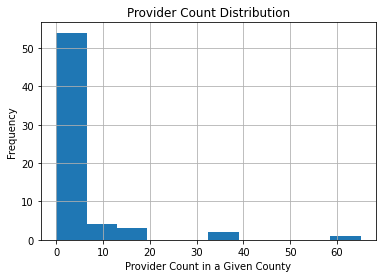

In [10]:
target = mergedTable['Provider Count']
print(f"Provider Count ranges from {target.min()} to {target.max()}")
print(target.value_counts())

target.hist()
plt.title("Provider Count Distribution")
plt.xlabel("Provider Count in a Given County")
plt.ylabel("Frequency")
plt.show()

### Since our distribution is so vast and heavily skewed right, we decided to evaluate the presense of vs lack of hospice providers

#### Classification

In [11]:
### Create a column that represents the presence (1) or lack of (0) hospice providers in that county
ordDF['Provider Count Binary'] = np.where(ordDF['Provider Count'] > 0, 1, 0)

Baseline Model

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Identify Data
data = ordDF.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

baseModel = DecisionTreeClassifier(random_state = 42)
baseModel.fit(X_train, y_train)

y_pred = baseModel.predict(X_test)
print(f"Baseline Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Baseline Classification Report:\n {classification_report(y_test, y_pred)}")

Baseline Classification Accuracy: 0.6153846153846154
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.62      0.71      0.67         7

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.61      0.62      0.61        13



With a test sample of 13, we should use cross-validation to get a more stable performance. <br> 
Precision is the proportion of correctly predicted positive instances out of all instances. Recall (Sensitivity) is the proportion of correctly predicted positive instances out of all actual positive instances. Decent for both, but room for improvement. <br>
f1-score considers both precision and recall, considers false positives and false negatives as well. A higher f1 indidcates a better performance

Baseline Importances

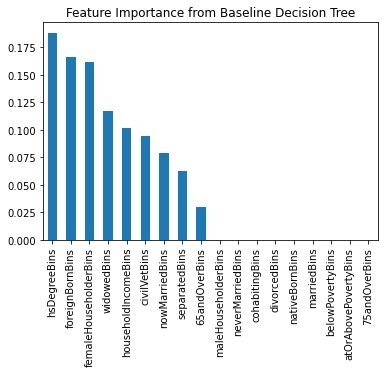

In [13]:
importances = baseModel.feature_importances_
features = X.columns
featImp = pd.Series(importances, index = features).sort_values(ascending = False)

featImp.plot(kind = 'bar')
plt.title("Feature Importance from Baseline Decision Tree")
plt.show()

Further Model Building/Testing

In [14]:
#### Weight Balance

### Identify Data
data = ordDF.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Classification Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.75      0.86      0.80         7

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76        13
weighted avg       0.77      0.77      0.77        13



weight balanced helped improve the model

In [15]:
#### K-folds
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
### Identify Data
data = ordDF.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Folds
k = 5
kf = StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)

model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
scores = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'f1', n_jobs= -1)

print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

finalmodel = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
finalmodel.fit(X_train, y_train)

y_pred = finalmodel.predict(X_test)
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Cross-validation accuracy scores: [0.83333333 0.57142857 0.66666667 0.46153846 0.61538462]
Mean CV accuracy: 0.6297 ± 0.1222
Classification Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.75      0.86      0.80         7

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76        13
weighted avg       0.77      0.77      0.77        13



Kfold of 5 made minor improvements

In [16]:
#### K-folds
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
### Identify Data
data = ordDF.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

# Folds
k = 10
kf = StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)

model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')

### Cross-validation
scores = cross_val_score(model, X, y, cv = kf, scoring = 'f1', n_jobs= -1)
print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train on model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Cross-validation accuracy scores: [0.4        0.57142857 0.6        0.5        0.33333333 0.66666667
 0.4        0.66666667 0.66666667 0.57142857]
Mean CV accuracy: 0.5376 ± 0.1171
Classification Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.75      0.86      0.80         7

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76        13
weighted avg       0.77      0.77      0.77        13



Kfold of 10 was no more effective than Kfold 5

In [17]:
#### K-folds
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

### Identify Data
data = ordDF.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'criterion' : ['gini', 'entropy'], 
    'max_features' : [None, 'sqrt', 'log2']
}

gs = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'),
    param_grid = params,
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42),
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)

# Train on model
gs.fit(X_train, y_train)


print(f"Best Parameters: {gs.best_params_}")
print(f"Best CV Score: {gs.best_score_:.4f}")


best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV Score: 0.7133
Classification Accuracy: 0.6153846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.60      0.86      0.71         7

    accuracy                           0.62        13
   macro avg       0.63      0.60      0.58        13
weighted avg       0.63      0.62      0.59        13



GS didn't seem to help here. Curious if overfitting. Will try less splits

In [18]:
#### K-folds
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

### Identify Data
data = ordDF.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'criterion' : ['gini', 'entropy'], 
    'max_features' : [None, 'sqrt', 'log2']
}

gs = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'),
    param_grid = params,
    cv = StratifiedKFold(n_splits = 2, shuffle = True, random_state = 42),
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)

# Train on model
gs.fit(X_train, y_train)


print(f"Best Parameters: {gs.best_params_}")
print(f"Best CV Score: {gs.best_score_:.4f}")


best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Fitting 2 folds for each of 810 candidates, totalling 1620 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.7204
Classification Accuracy: 0.6153846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.62      0.71      0.67         7

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.61      0.62      0.61        13



In [19]:
#### K-folds
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

### Identify Data
data = ordDF.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

params = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, None],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion' : ['gini', 'entropy'], 
    'max_features' : [None, 'sqrt', 'log2']
}

gs = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'),
    param_grid = params,
    cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42),
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)

# Train on model
gs.fit(X_train, y_train)
print(f"Best Parameters: {gs.best_params_}")
print(f"Best CV Score: {gs.best_score_:.4f}")


best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Fitting 3 folds for each of 9180 candidates, totalling 27540 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
Best CV Score: 0.7298
Classification Accuracy: 0.5384615384615384
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.55      0.86      0.67         7

    accuracy                           0.54        13
   macro avg       0.52      0.51      0.46        13
weighted avg       0.52      0.54      0.47        13



BASELINE <br>

Baseline Classification Accuracy: 0.6153846153846154 <br>
Baseline Classification Report: <br>
|               | precision  |  recall | f1-score |  support|
|    ----       | ----  |  ---- | ---- |  ---- |
|           0   |    0.60    |  0.50   |  0.55   |    6 |
|           1   |   0.62     |  0.71   |  0.67   |    7 |
|    accuracy   |            |         |  0.62   |   13 |
|   macro avg   |    0.61    |  0.61   |  0.61   |   13 |
| weighted avg  |    0.61    |  0.62   |  0.61   |   13 |


the best one so far:

In [20]:
#### K-folds
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
### Identify Data
data = ordDF.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Folds
k = 5
kf = StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)

model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
scores = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'f1', n_jobs= -1)

print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

finalmodel = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
finalmodel.fit(X_train, y_train)

y_pred = finalmodel.predict(X_test)
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Cross-validation accuracy scores: [0.83333333 0.57142857 0.66666667 0.46153846 0.61538462]
Mean CV accuracy: 0.6297 ± 0.1222
Classification Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.75      0.86      0.80         7

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76        13
weighted avg       0.77      0.77      0.77        13



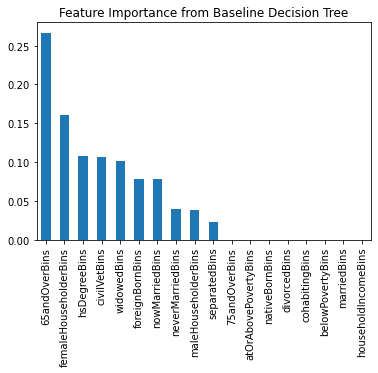

In [21]:
importances = finalmodel.feature_importances_
features = X.columns
featImp = pd.Series(importances, index = features).sort_values(ascending = False)

featImp.plot(kind = 'bar')
plt.title("Feature Importance from Baseline Decision Tree")
plt.show()

### Code below is like above but removed highly correlated attributes and adds the alzhiemers bins

In [25]:
import re
# Load alhiemer rates
df = pd.read_csv("CO_County_Alzheimers_Rates.csv")

if df['County'].dtypes == 'object':
    df['County'] = df['County'].astype(str) + ' County'
df

,County,Total Pop. Age 65+,AD Cases Age 65+,AD Prevalence (Age 65+)
0,Adams County,"57,400","6,100",10.7%
1,Alamosa County,"2,400",300,11.5%
2,Arapahoe County,"92,000","9,800",10.6%
3,Archuleta County,"3,900",300,8.8%
4,Baca County,900,100,12.5%
...,...,...,...,...
59,Summit County,"4,500",300,7.4%
60,Teller County,"6,200",500,7.7%
61,Washington County,"1,000",100,10.8%
62,Weld County,"42,500","4,300",10.1%


In [26]:
### Clean alz data but converting to floats and removing '< 50' with 49 - I figured with bins it would be okay because you already did the percent calc
df[["Total Pop. Age 65+", "AD Cases Age 65+", "AD Prevalence (Age 65+)"]] = (df[["Total Pop. Age 65+", "AD Cases Age 65+", "AD Prevalence (Age 65+)"]].replace({",": "", "%": "", '< 50': '49'}, regex=True).astype(float))
df.dtypes

County                      object
Total Pop. Age 65+         float64
AD Cases Age 65+           float64
AD Prevalence (Age 65+)    float64
dtype: object

In [27]:
### Create bin for alzheimers
df['AD Prevalence Bins(Age 65+)'] = pd.qcut(df['AD Prevalence (Age 65+)'], q =5, labels = ['Very Low','Low', 'Medium', 'High', 'Very High'])
df

,County,Total Pop. Age 65+,AD Cases Age 65+,AD Prevalence (Age 65+),AD Prevalence Bins(Age 65+)
0,Adams County,57400.0,6100.0,10.7,High
1,Alamosa County,2400.0,300.0,11.5,High
2,Arapahoe County,92000.0,9800.0,10.6,High
3,Archuleta County,3900.0,300.0,8.8,Low
4,Baca County,900.0,100.0,12.5,Very High
...,...,...,...,...,...
59,Summit County,4500.0,300.0,7.4,Very Low
60,Teller County,6200.0,500.0,7.7,Very Low
61,Washington County,1000.0,100.0,10.8,High
62,Weld County,42500.0,4300.0,10.1,Medium


In [28]:
### Rename County to County Name
df = df.rename(columns={'County': 'County Name'})

### Keep only bin col
dfAlz = df[['County Name', 'AD Prevalence Bins(Age 65+)']]
dfAlz.sort_values('County Name')


,County Name,AD Prevalence Bins(Age 65+)
0,Adams County,High
1,Alamosa County,High
2,Arapahoe County,High
3,Archuleta County,Low
4,Baca County,Very High
...,...,...
59,Summit County,Very Low
60,Teller County,Very Low
61,Washington County,High
62,Weld County,Medium


In [29]:
mergedTableAlz = pd.merge(ordDF, dfAlz, on = 'County Name', how = 'left')
mergedTableAlz.head(3)

,County,County Name,geometry,Provider Count,householdIncomeBins,hsDegreeBins,marriedBins,cohabitingBins,maleHouseholderBins,femaleHouseholderBins,...,divorcedBins,nativeBornBins,foreignBornBins,civilVetBins,belowPovertyBins,atOrAbovePovertyBins,65andOverBins,75andOverBins,Provider Count Binary,AD Prevalence Bins(Age 65+)
0,08069,Larimer County,"POLYGON ((-105.05673 40.34929, -105.05664 40.3...",14.0,4.0,5.0,3.0,5.0,1.0,3.0,...,1.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,1,Low
1,08071,Las Animas County,"POLYGON ((-104.14319 37.75834, -104.14408 37.7...",1.0,1.0,2.0,1.0,5.0,4.0,4.0,...,4.0,4.0,2.0,4.0,5.0,1.0,5.0,5.0,1,Very High
2,08043,Fremont County,"POLYGON ((-105.36890 38.25941, -105.36889 38.2...",2.0,2.0,2.0,2.0,4.0,2.0,4.0,...,5.0,5.0,1.0,5.0,4.0,2.0,4.0,4.0,1,Medium


#### Correlation

In [30]:
### Import mergedTable
corrDF = pd.read_pickle('corrDF.pkl')

In [31]:
corrMatrix = corrDF.corr()

In [32]:
### Evaluate CorrMatrix
### I don't want to see correlations between items from the same table
excludedGroups = [
    {'marriedBins', 'cohabitingBins', 'maleHouseholderBins', 'femaleHouseholderBins', 'neverMarriedBins', 'nowMarriedBins',	'separatedBins', 'widowedBins', 'divorcedBins'},
	{'nativeBornBins', 'foreignBornBins'},
	{'belowPovertyBins', 'atOrAbovePovertyBins'},
	{'65andOverBins', '75andOverBins'},
    
]

def excludedPairs(col1, col2):
    for group in excludedGroups:
        if col1 in group and col2 in group:
            return True
    return False


In [33]:
### Build correlation DF
corrPairs = corrMatrix.unstack().reset_index()
corrPairs.columns = ['Var 1', 'Var 2', 'Correlation']
corrPairs = corrPairs[corrPairs['Var 1'] != corrPairs['Var 2']]

## Avoid duplicates like (A,B) and (B,A) 
corrPairs['Pair'] = corrPairs.apply(lambda row: tuple(sorted([row['Var 1'], row['Var 2']])), axis=1)
corrPairs = corrPairs.drop_duplicates('Pair')

## Fliter out excluded pairs
corrPairs = corrPairs[~corrPairs['Pair'].apply(lambda x: excludedPairs(*x))]

## Calculate abs and sort
corrPairs['AbsCorr'] = corrPairs['Correlation'].abs()
sortedCorrPairs = corrPairs.sort_values(by = 'AbsCorr', ascending=False).round(2)

sortedCorrPairs

,Var 1,Var 2,Correlation,Pair,AbsCorr
34,householdIncomeBins,belowPovertyBins,-0.78,"(belowPovertyBins, householdIncomeBins)",0.78
35,householdIncomeBins,atOrAbovePovertyBins,0.78,"(atOrAbovePovertyBins, householdIncomeBins)",0.78
29,householdIncomeBins,widowedBins,-0.74,"(householdIncomeBins, widowedBins)",0.74
208,widowedBins,75andOverBins,0.66,"(75andOverBins, widowedBins)",0.66
37,householdIncomeBins,75andOverBins,-0.63,"(75andOverBins, householdIncomeBins)",0.63
...,...,...,...,...,...
108,maleHouseholderBins,foreignBornBins,0.01,"(foreignBornBins, maleHouseholderBins)",0.01
107,maleHouseholderBins,nativeBornBins,-0.01,"(maleHouseholderBins, nativeBornBins)",0.01
223,divorcedBins,civilVetBins,0.01,"(civilVetBins, divorcedBins)",0.01
221,divorcedBins,nativeBornBins,-0.01,"(divorcedBins, nativeBornBins)",0.01


In [34]:
### Drop 75andOverBins and atOrAbovePovertyBins because they are over abs(0.75) correlated
mergedTableAlz = mergedTableAlz.drop(columns = ['75andOverBins', 'atOrAbovePovertyBins'])

### Ordinal values for category
ordinalMap = {'Very Low': 1, 'Low': 2, "Medium": 3, 'High': 4, 'Very High': 5}
mergedTableAlz['AD Prevalence Bins(Age 65+)'] = mergedTableAlz['AD Prevalence Bins(Age 65+)'].replace(ordinalMap).astype(float)
mergedTableAlz.dtypes

County                           object
County Name                      object
geometry                       geometry
Provider Count                  float64
householdIncomeBins             float64
hsDegreeBins                    float64
marriedBins                     float64
cohabitingBins                  float64
maleHouseholderBins             float64
femaleHouseholderBins           float64
neverMarriedBins                float64
nowMarriedBins                  float64
separatedBins                   float64
widowedBins                     float64
divorcedBins                    float64
nativeBornBins                  float64
foreignBornBins                 float64
civilVetBins                    float64
belowPovertyBins                float64
65andOverBins                   float64
Provider Count Binary             int32
AD Prevalence Bins(Age 65+)     float64
dtype: object

### Building Model with Alz data

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Identify Data
data = mergedTableAlz.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

baseModel = DecisionTreeClassifier(random_state = 42)
baseModel.fit(X_train, y_train)

y_pred = baseModel.predict(X_test)
print(f"Baseline Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Baseline Classification Report:\n {classification_report(y_test, y_pred)}")

Baseline Classification Accuracy: 0.6153846153846154
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.62      0.71      0.67         7

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.61      0.62      0.61        13



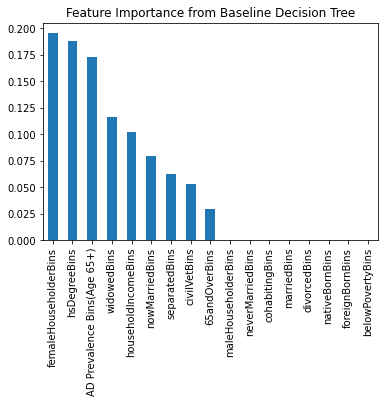

In [36]:
importances = baseModel.feature_importances_
features = X.columns
featImp = pd.Series(importances, index = features).sort_values(ascending = False)

featImp.plot(kind = 'bar')
plt.title("Feature Importance from Baseline Decision Tree")
plt.show()

In [37]:
#### Weight Balance

### Identify Data
data = mergedTableAlz.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Classification Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.75      0.86      0.80         7

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76        13
weighted avg       0.77      0.77      0.77        13



Weight balanced helped, lets try k-folds

In [38]:
#### K-folds
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
### Identify Data
data = mergedTableAlz.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Folds
k = 5
kf = StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)

model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
scores = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'f1', n_jobs= -1)

print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

finalmodel = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
finalmodel.fit(X_train, y_train)

y_pred = finalmodel.predict(X_test)
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Cross-validation accuracy scores: [0.76923077 0.75       0.5        0.83333333 0.76923077]
Mean CV accuracy: 0.7244 ± 0.1157
Classification Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.75      0.86      0.80         7

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76        13
weighted avg       0.77      0.77      0.77        13



No improvement, lets try more k-folds

In [39]:
#### K-folds
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
### Identify Data
data = mergedTableAlz.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Folds
k = 10
kf = StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)

model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
scores = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'f1', n_jobs= -1)

print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

finalmodel = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
finalmodel.fit(X_train, y_train)

y_pred = finalmodel.predict(X_test)
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Cross-validation accuracy scores: [0.66666667 0.8        0.         0.33333333 0.66666667 0.66666667
 0.5        0.4        0.5        0.66666667]
Mean CV accuracy: 0.5200 ± 0.2202
Classification Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.75      0.86      0.80         7

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76        13
weighted avg       0.77      0.77      0.77        13



K-fold 10 was no more effective than k-fold 5, lets try grid search

In [40]:
#### K-folds
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

### Identify Data
data = mergedTableAlz.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'criterion' : ['gini', 'entropy'], 
    'max_features' : [None, 'sqrt', 'log2']
}

gs = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'),
    param_grid = params,
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42),
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)

# Train on model
gs.fit(X_train, y_train)


print(f"Best Parameters: {gs.best_params_}")
print(f"Best CV Score: {gs.best_score_:.4f}")


best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.6981
Classification Accuracy: 0.6153846153846154
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.58      1.00      0.74         7

    accuracy                           0.62        13
   macro avg       0.79      0.58      0.51        13
weighted avg       0.78      0.62      0.53        13



Not the best, trying less splits

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Identify Data
data = mergedTableAlz.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

baseModel = DecisionTreeClassifier(random_state = 42)
baseModel.fit(X_train, y_train)

y_pred = baseModel.predict(X_test)
print(f"Baseline Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Baseline Classification Report:\n {classification_report(y_test, y_pred)}")

Baseline Classification Accuracy: 0.6153846153846154
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.62      0.71      0.67         7

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.61      0.62      0.61        13



Best one so far with Alz data

In [42]:
#### K-folds
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
### Identify Data
data = mergedTableAlz.copy()
X = data.drop(['County', 'County Name', 'geometry', 'Provider Count', 'Provider Count Binary'] , axis = 1)
y = data['Provider Count Binary']

### Split Training Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Folds
k = 5
kf = StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)

model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
scores = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'f1', n_jobs= -1)

print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

finalmodel = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
finalmodel.fit(X_train, y_train)

y_pred = finalmodel.predict(X_test)
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Cross-validation accuracy scores: [0.76923077 0.75       0.5        0.83333333 0.76923077]
Mean CV accuracy: 0.7244 ± 0.1157
Classification Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.75      0.86      0.80         7

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76        13
weighted avg       0.77      0.77      0.77        13



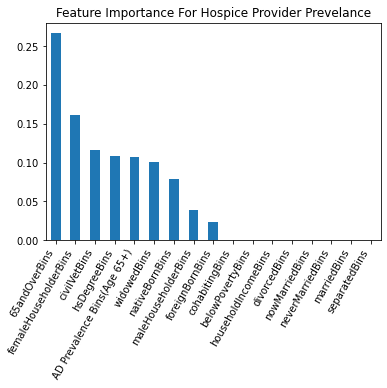

In [43]:
importances = finalmodel.feature_importances_
features = X.columns
featImp = pd.Series(importances, index = features).sort_values(ascending = False)

featImp.plot(kind = 'bar')
plt.title("Feature Importance For Hospice Provider Prevelance")
plt.xticks(rotation=60, ha='right')
plt.show()

In [44]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

dummy = DummyClassifier(strategy = 'most_frequent', random_state = 42)
dummy.fit(X_train, y_train)

dummy_pred = dummy.predict(X_test)

print(f"Dummy Accuracy: {accuracy_score(y_test, dummy_pred):.4f}")
print("Dummy Classification Report:")
print(classification_report(y_test, dummy_pred, zero_division = 0))

Dummy Accuracy: 0.5385
Dummy Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.54      1.00      0.70         7

    accuracy                           0.54        13
   macro avg       0.27      0.50      0.35        13
weighted avg       0.29      0.54      0.38        13



In [45]:
### Import in population count of 65+ individuals per county
merged65andOver = pd.read_pickle('merged65andOver.pkl')
merged65andOver

,County Name,65andOverSum
0,Adams County,57841
1,Alamosa County,2436
2,Arapahoe County,92071
3,Archuleta County,3801
4,Baca County,866
...,...,...
59,Summit County,4739
60,Teller County,5989
61,Washington County,1060
62,Weld County,43229


In [46]:
## Merged 65+ population with table above
mergedTableAlz = pd.merge(mergedTableAlz, merged65andOver, on='County Name')
mergedTableAlz.head(2)

,County,County Name,geometry,Provider Count,householdIncomeBins,hsDegreeBins,marriedBins,cohabitingBins,maleHouseholderBins,femaleHouseholderBins,...,widowedBins,divorcedBins,nativeBornBins,foreignBornBins,civilVetBins,belowPovertyBins,65andOverBins,Provider Count Binary,AD Prevalence Bins(Age 65+),65andOverSum
0,08069,Larimer County,"POLYGON ((-105.05673 40.34929, -105.05664 40.3...",14.0,4.0,5.0,3.0,5.0,1.0,3.0,...,2.0,1.0,3.0,3.0,2.0,3.0,2.0,1,2.0,61264
1,08071,Las Animas County,"POLYGON ((-104.14319 37.75834, -104.14408 37.7...",1.0,1.0,2.0,1.0,5.0,4.0,4.0,...,4.0,4.0,4.0,2.0,4.0,5.0,5.0,1,5.0,3683


In [47]:
### Create scoring table that calculates sums the ordinal bins of top attributes and assess for county with high scores and low number of hospice providers
mergedTableAlzFinal = mergedTableAlz[['County Name', 'Provider Count', '65andOverSum', '65andOverBins', 'femaleHouseholderBins', 'civilVetBins', 'hsDegreeBins', 'AD Prevalence Bins(Age 65+)']]
mergedTableAlzFinal['Score'] = mergedTableAlzFinal[['65andOverBins', 'femaleHouseholderBins', 'civilVetBins', 'hsDegreeBins', 'AD Prevalence Bins(Age 65+)']].sum(axis = 1)
sorted_df = mergedTableAlzFinal.sort_values(by=['Score', 'Provider Count', '65andOverSum'], ascending=[False, True, False])

sorted_df.head(10)

C:\Users\erinb\AppData\Local\Temp\ipykernel_11252\1542527012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedTableAlzFinal['Score'] = mergedTableAlzFinal[['65andOverBins', 'femaleHouseholderBins', 'civilVetBins', 'hsDegreeBins', 'AD Prevalence Bins(Age 65+)']].sum(axis = 1)


,County Name,Provider Count,65andOverSum,65andOverBins,femaleHouseholderBins,civilVetBins,hsDegreeBins,AD Prevalence Bins(Age 65+),Score
18,Delta County,1.0,8701,5.0,5.0,5.0,3.0,3.0,21.0
63,Huerfano County,0.0,2360,5.0,5.0,4.0,2.0,4.0,20.0
19,Costilla County,0.0,981,5.0,3.0,5.0,2.0,5.0,20.0
49,Hinsdale County,0.0,323,5.0,4.0,4.0,5.0,2.0,20.0
1,Las Animas County,1.0,3683,5.0,4.0,4.0,2.0,5.0,20.0
28,Sedgwick County,1.0,574,4.0,5.0,4.0,2.0,5.0,20.0
53,Montrose County,2.0,10968,4.0,4.0,4.0,3.0,4.0,19.0
38,Pueblo County,17.0,32738,3.0,5.0,4.0,2.0,5.0,19.0
57,Archuleta County,0.0,3801,5.0,2.0,5.0,4.0,2.0,18.0
34,Saguache County,0.0,1726,5.0,5.0,5.0,1.0,2.0,18.0
